The Vitale Property
===================

This program calculates the Polydivisible numbers. It is inspired by a
[blog post](http://www.blog.republicofmath.com/the-number-3608528850368400786036725/) on (republicofmath.com) which highlighted a result of Ben Vitale
for a 25 digit polydivisible number. More information on polydivisible number can be found on the [wikipedia page](https://en.wikipedia.org/wiki/Polydivisible_number), or the [Online Encyclopedia of Integer Sequences](http://oeis.org/A144688).

Polydivisible Numbers
---------------------
3608528850368400786036725 is the only 25 digit number which satisfies
the polydivisibilty (or Vitale) property. It is divisible by 25, it's
first 24 digits are divisible by 24, it's first 23 digits are divisible
by 23 etc. all the way down to 2. There are NO 26 digit numbers which
extend this property.

In [1]:
import math

In [2]:
def vitaleProperty(n):
    if n == 2:
        return range(10, 99, 2)
    else:
        vnums = []
        for vnum in vitaleProperty(n-1):
            vnum = vnum * 10
            for j in range(10):
                if ((vnum + j) % n == 0):
                    vnums.append(vnum + j)

        return vnums

In [3]:
n = 2
nvnums = []

In [4]:
while True:
    vitale_n = vitaleProperty(n)
    if (len(vitale_n) > 0):
        nvnums.append(len(vitale_n))
        n = n + 1
    else:
        break

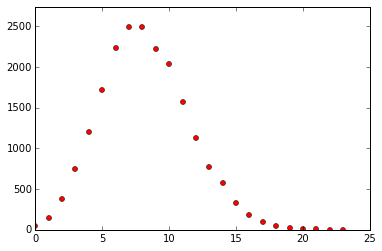

In [5]:
try:
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.plot(nvnums, 'ro', markersize=5)
    plt.ylim([0, max(nvnums) * 1.1])
    plt.show()
except ImportError:
    print('\n'.join('{:3}: {}'.format(*k) for k in enumerate(nvnums)))

As discussed in the wikipedia article, a polydivisible number with n-1 digits can be extended to a polydivisible number with n digits in 10/n different ways. So we can estimate the number of n-digit polydivisible numbers
$$ F(n) \approx \frac{9\times 10^{n-1}}{n!} $$
The value tends to zero as $n\to \infty$ and we can sum this over the values of n to get an estimate of the total number of polydivisible numbers
$$\frac{9(e^{10}-1)}{10}$$

In [6]:
S_f = (9 * math.e**(10))/10

int(S_f)


19823

In [7]:
sum(nvnums)

20447

So the estimate is off by only

In [8]:
(sum(nvnums) - S_f) / sum(nvnums)

0.030477859083188966

i.e. $3\%$